## Text EDA using lyrics from Taylor Swift :)

**The dataset contains follwing fields
**
* Album name
* Track title
* Track number
* Lyric text
* Line number of the lyric in the track
* Year of release of the album

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import pandas as pd
import datetime as dt
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['font.size'] = 14
width = 0.75
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from collections import defaultdict
import string
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set_palette(sns.color_palette('tab20', 20))
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from datetime import date, timedelta
import operator 
import re
import spacy
from spacy import displacy
from spacy.util import minibatch, compounding
import spacy #load spacy
nlp = spacy.load("en_core_web_trf")
#stops = stopwords.words("english")
from tqdm import  tqdm
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from IPython.display import IFrame
from IPython.core.display import display, HTML

2022-03-18 16:02:58.253891: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-18 16:02:58.253923: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
data = pd.read_csv("taylor_swift_lyrics.csv",encoding = "latin1")


In [3]:
data.head()

,artist,album,track_title,track_n,lyric,line,year
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006


Basic Lyric Understanding 

In [4]:
def get_features(df):    
    data['lyric'] = data['lyric'].apply(lambda x:str(x))
    data['total_length'] = data['lyric'].apply(len)
    data['capitals'] = data['lyric'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
    data['caps_vs_length'] = data.apply(lambda row: float(row['capitals'])/float(row['total_length']),
                                axis=1)
    data['num_words'] = data.lyric.str.count('\S+')
    data['num_unique_words'] = data['lyric'].apply(lambda comment: len(set(w for w in comment.split())))
    data['words_vs_unique'] = data['num_unique_words'] / df['num_words']  
    return df

In [5]:
train = get_features(data)
data_pair = data.filter(['album', 'year', 'total_length','capitals','caps_vs_length','num_words','num_unique_words','words_vs_unique'],axis=1)

In [6]:
data_pair.groupby(["album", "year"]).sum().sort_values("year")

,,total_length,capitals,caps_vs_length,num_words,num_unique_words,words_vs_unique
album,year,,,,,,
Taylor Swift,2006,18996,735,25.933224,3986,3867,552.920872
Fearless,2008,20840,785,25.902615,4363,4188,542.567787
Speak Now,2010,32525,1190,38.774008,6709,6531,910.759683
Red,2012,30992,1163,37.183266,6326,6035,814.172237
1989,2014,31797,1372,47.909134,6737,6143,892.068337
reputation,2017,33592,1340,44.948364,7121,6793,970.557043


### Pairplot allows us to see both distribution of single variables and relationships between two variables.

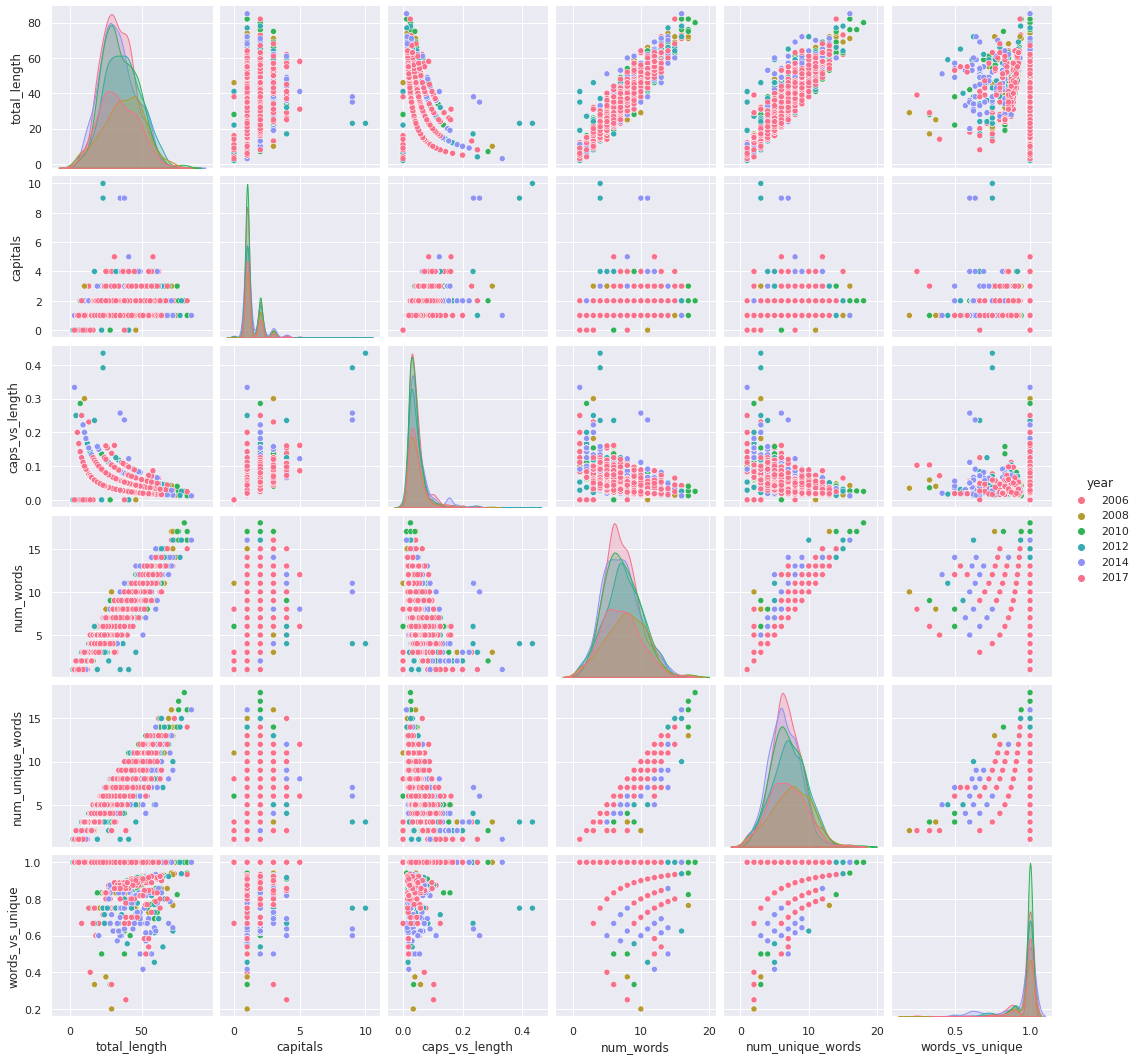

In [58]:
sns.pairplot(data_pair,hue='year',palette="husl");

## Expanding English language contractions 

In [7]:
contraction_mapping_1 = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", 
                       "could've": "could have", "couldn't": "could not", "didn't": "did not",  
                       "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", 
                       "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", 
                       "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  
                       "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have",
                       "I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", 
                       "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                       "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", 
                       "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", 
                       "mayn't": "may not", "might've": "might have","mightn't": "might not",
                       "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", 
                       "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                       "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", 
                       "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", 
                       "she'd": "she would", "she'd've": "she would have", "she'll": "she will", 
                       "she'll've": "she will have", "she's": "she is", "should've": "should have", 
                       "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                       "so's": "so as", "this's": "this is","that'd": "that would", 
                       "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                       "there'd've": "there would have", "there's": "there is", "here's": "here is",
                       "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                       "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                       "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", 
                       "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                       "weren't": "were not", "what'll": "what will", "what'll've": "what will have", 
                       "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is",
                       "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", 
                       "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", 
                       "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", 
                       "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                       "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                       "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                       "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                       "you'll've": "you will have", "you're": "you are", "you've": "you have" ,
                       "Isn't":"is not", "\u200b":"", "It's": "it is","I'm": "I am","don't":"do not","did't":"did not","ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                       "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                       "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                       "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                       "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                       "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                       "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                       "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", 
                       "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                       "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
                       "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", 
                       "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", 
                       "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                       "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", 
                       "there'd": "there would", "there'd've": "there would have", "there's": "there is",
                       "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have",
                       "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", 
                       "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
                       "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", 
                       "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is",
                       "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }


In [8]:
def clean_contractions(text, mapping):
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    return text

In [9]:
def get_features(df):    
    data['Clean_Lyrics'] = data['Clean_Lyrics'].apply(lambda x:str(x))
    data['total_length'] = data['Clean_Lyrics'].apply(len)
    data['capitals'] = data['Clean_Lyrics'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
    data['caps_vs_length'] = data.apply(lambda row: float(row['capitals'])/float(row['total_length']),
                                axis=1)
    data['num_words'] = data.lyric.str.count('\S+')
    data['num_unique_words'] = data['Clean_Lyrics'].apply(lambda comment: len(set(w for w in comment.split())))
    data['words_vs_unique'] = data['num_unique_words'] / df['num_words']  
    return df

In [10]:
data['Clean_Lyrics'] = data['lyric'].apply(lambda x: clean_contractions(x, contraction_mapping_1))
#Stopwords
data['Clean_Lyrics'] = data['Clean_Lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS)]))
#Re-calculate the features
train = get_features(data)

In [11]:
data.head().T

,0,1,2,3,4
artist,Taylor Swift,Taylor Swift,Taylor Swift,Taylor Swift,Taylor Swift
album,Taylor Swift,Taylor Swift,Taylor Swift,Taylor Swift,Taylor Swift
track_title,Tim McGraw,Tim McGraw,Tim McGraw,Tim McGraw,Tim McGraw
track_n,1,1,1,1,1
lyric,He said the way my blue eyes shined,Put those Georgia stars to shame that night,"I said, ""That's a lie""",Just a boy in a Chevy truck,That had a tendency of gettin' stuck
line,1,2,3,4,5
year,2006,2006,2006,2006,2006
total_length,28,29,20,20,27
capitals,1,2,2,2,1
caps_vs_length,0.035714,0.068966,0.1,0.1,0.037037


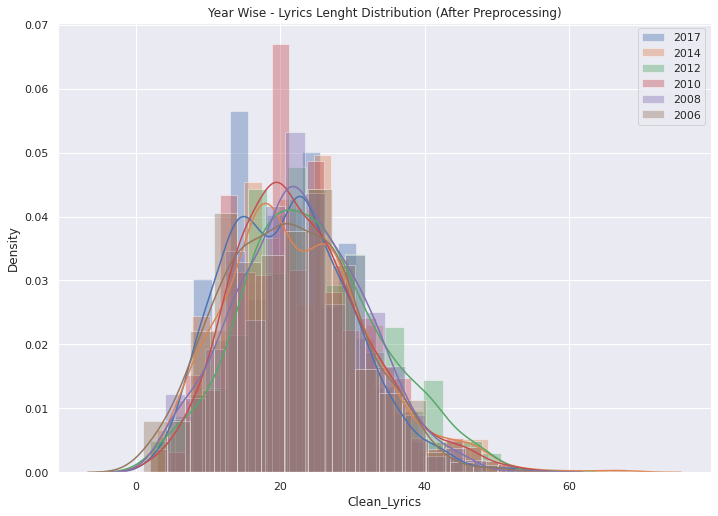

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
y1 = data[data['year'] == 2017]['Clean_Lyrics'].str.len()
sns.distplot(y1, label='2017')
y2 = data[data['year'] == 2014]['Clean_Lyrics'].str.len()
sns.distplot(y2, label='2014')
y3 = data[data['year'] == 2012]['Clean_Lyrics'].str.len()
sns.distplot(y3, label='2012')
y4 = data[data['year'] == 2010]['Clean_Lyrics'].str.len()
sns.distplot(y4, label='2010')
y5 = data[data['year'] == 2008]['Clean_Lyrics'].str.len()
sns.distplot(y5, label='2008')
y6 = data[data['year'] == 2006]['Clean_Lyrics'].str.len()
sns.distplot(y6, label='2006')
plt.title('Year Wise - Lyrics Lenght Distribution (After Preprocessing)')
plt.legend();


In [13]:
data['year'].value_counts()

2017    1006
2014     953
2010     930
2012     845
2006     567
2008     561
Name: year, dtype: int64

In [14]:
def ngram_extractor(text, n_gram):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# Function to generate a dataframe with n_gram and top max_row frequencies
def generate_ngrams(df, col, n_gram, max_row):
    temp_dict = defaultdict(int)
    for question in df[col]:
        for word in ngram_extractor(question, n_gram):
            temp_dict[word] += 1
    temp_df = pd.DataFrame(sorted(temp_dict.items(), key=lambda x: x[1])[::-1]).head(max_row)
    temp_df.columns = ["word", "wordcount"]
    return temp_df

def comparison_plot(df_1,df_2,col_1,col_2, space):
    fig, ax = plt.subplots(1, 2, figsize=(20,10))
    
    sns.barplot(x=col_2, y=col_1, data=df_1, ax=ax[0], color="skyblue")
    sns.barplot(x=col_2, y=col_1, data=df_2, ax=ax[1], color="skyblue")

    ax[0].set_xlabel('Word count', size=14, color="green")
    ax[0].set_ylabel('Words', size=18, color="green")
    ax[0].set_title('Top words in 2017 Lyrics', size=18, color="green")

    ax[1].set_xlabel('Word count', size=14, color="green")
    ax[1].set_ylabel('Words', size=18, color="green")
    ax[1].set_title('Top words in 2008 Lyrics', size=18, color="green")

    fig.subplots_adjust(wspace=space)
    
    plt.show()

## Ngram Lyrics Anaysis 2017 vs 2008 

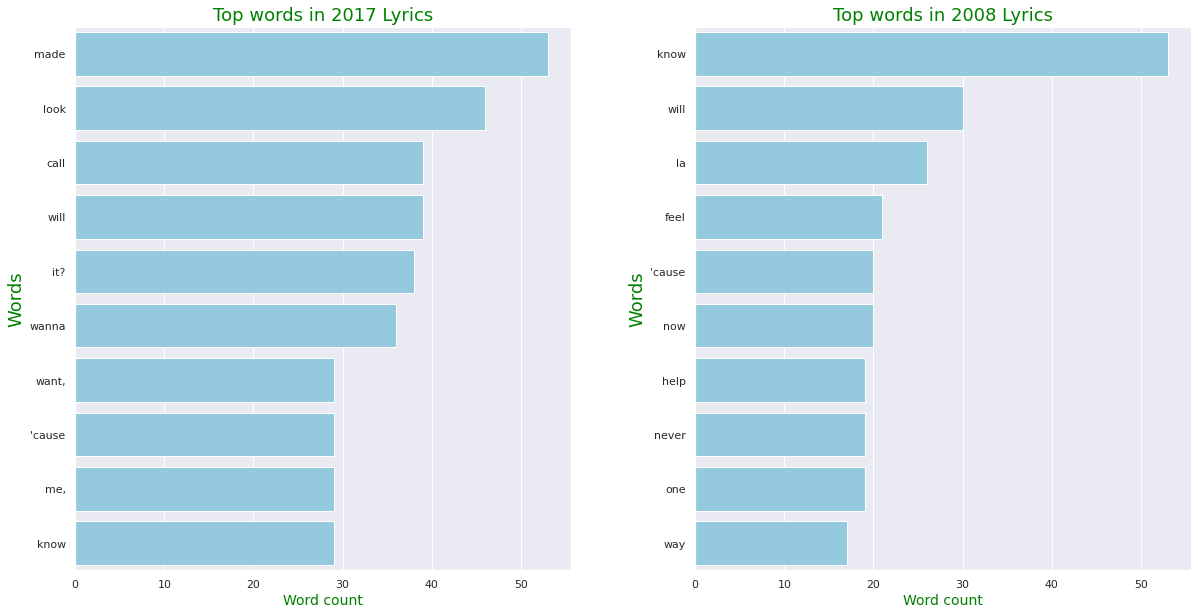

In [15]:
Lyrics_2017 = generate_ngrams(train[train["year"]==2017], 'Clean_Lyrics', 1, 10)
Lyrics_2008 = generate_ngrams(data[data["year"]==2008], 'Clean_Lyrics', 1, 10)
comparison_plot(Lyrics_2017,Lyrics_2008,'word','wordcount', 0.25)

## Bigram Lyrics Anaysis 2017 vs 2008 

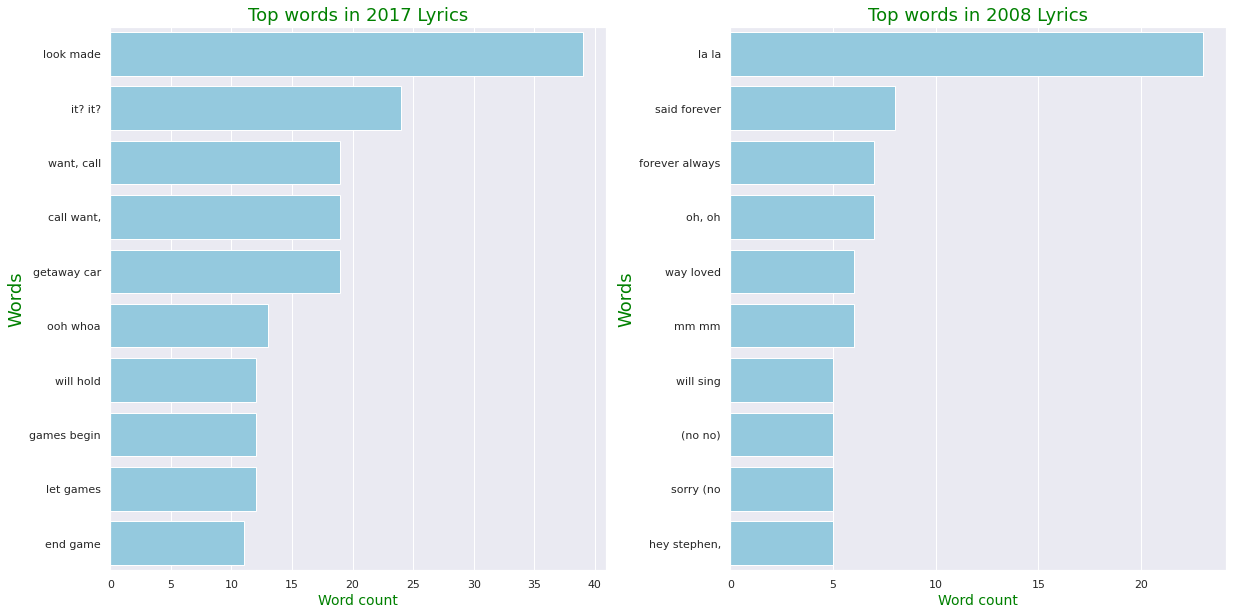

In [16]:
Lyrics_2017 = generate_ngrams(train[train["year"]==2017], 'Clean_Lyrics', 2, 10)
Lyrics_2008 = generate_ngrams(data[data["year"]==2008], 'Clean_Lyrics', 2, 10)
comparison_plot(Lyrics_2017,Lyrics_2008,'word','wordcount', 0.25)

## Trigram Lyrics Anaysis 2017 vs 2008 

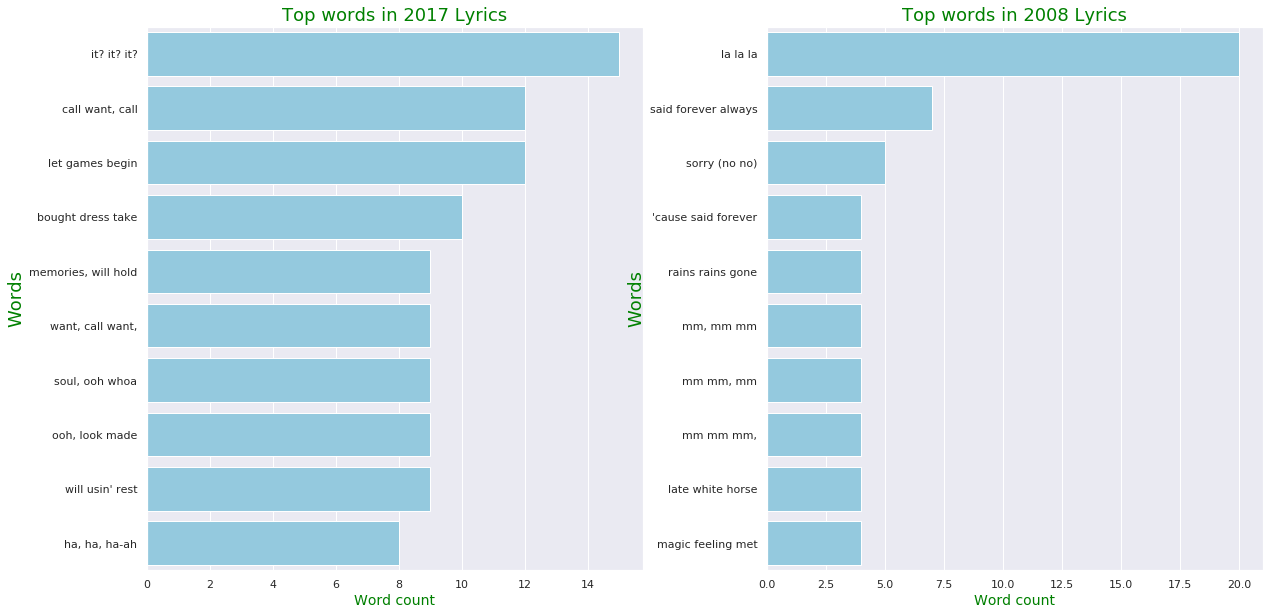

In [19]:
Lyrics_2017 = generate_ngrams(train[train["year"]==2017], 'Clean_Lyrics', 3, 10)
Lyrics_2008 = generate_ngrams(data[data["year"]==2008], 'Clean_Lyrics', 3, 10)
comparison_plot(Lyrics_2017,Lyrics_2008,'word','wordcount', 0.25)

Scattertext is an open source tool for visualizing linguistic variation between document categories in a language-independent way. The tool presents a scatterplot, where each axis corresponds to the rank-frequency a term occurs in a category of documents. Through a tie-breaking strategy, the tool is able to display thousands of visible term-representing points and find space to legibly label hundreds of them. Scattertext also lends itself to a query-based visualization of how the use of terms with similar embeddings differs between document categories, as well as a visualization for comparing the importance scores of bag-of-words features to univariate metrics. 

In [ ]:
import scattertext as st
data['parsed'] = data.Clean_Lyrics.apply(nlp)


In [21]:
corpus = st.CorpusFromParsedDocuments(data,
                             category_col='album',
                             parsed_col='parsed').build()


In [22]:
html = st.produce_scattertext_explorer(corpus,
          category='reputation',
          category_name='reputation',
          not_category_name='1989',
          width_in_pixels=600,
          minimum_term_frequency=5,
          term_significance = st.LogOddsRatioUninformativeDirichletPrior(),
          )

In [23]:
filename = "reputation-vs-1989.html"
open(filename, 'wb').write(html.encode('utf-8'))
IFrame(src=filename, width = 800, height=700)


725178

Thank you :)